In [1]:
import os, json, pandas

In [2]:
from pathlib import Path

In [3]:
dataset_path_str = 'STEW_Dataset'
data_path = Path(dataset_path_str)

In [4]:
sub_file = os.path.join(dataset_path_str, os.listdir(data_path)[0])
sub_file

'STEW_Dataset/sub22_lo.txt'

In [5]:
with open(sub_file) as f:
    file_dat = f.readlines()

In [6]:
import numpy as np
data_parts = np.array([part.strip().split() for part in file_dat])

In [7]:
data_parts.shape

(19200, 14)

In [8]:
data_parts[0, :]

array(['4.3502600e+03', '4.6287200e+03', '4.3348700e+03', '4.4394900e+03',
       '4.3302600e+03', '4.4902600e+03', '4.4574400e+03', '4.3169200e+03',
       '4.2215400e+03', '4.7769200e+03', '4.5835900e+03', '4.4707700e+03',
       '4.6692300e+03', '4.3276900e+03'], dtype='<U13')

In [9]:
from matplotlib import pyplot as plt

In [10]:
from mne.preprocessing import ICA
from mne import filter as mne_filter

In [124]:
ica = ICA(n_components=14, max_iter='auto', random_state=97)

In [13]:
data_parts.shape

(19200, 14)

In [14]:
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
channel_types = ['eeg' for _ in range(len(channel_names))]

In [15]:
import mne

In [16]:
s_freq = 128
channel_info = mne.create_info(ch_names=channel_names, ch_types=channel_types, sfreq=s_freq)

In [17]:
participant_raw = mne.io.RawArray(np.transpose(data_parts), channel_info)

Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


In [125]:
ica.fit(participant_raw)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


<ipython-input-125-052154413658>:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(participant_raw)


Fitting ICA took 7.7s.


/home/srikrishna/conda/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


<ICA | raw data decomposition, fit (fastica): 19200 samples, 14 components, channels used: "eeg">

In [19]:
out_ica = ica.fit(participant_raw)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


<ipython-input-19-ee46d56005b6>:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  out_ica = ica.fit(participant_raw)


Fitting ICA took 7.3s.


/home/srikrishna/conda/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


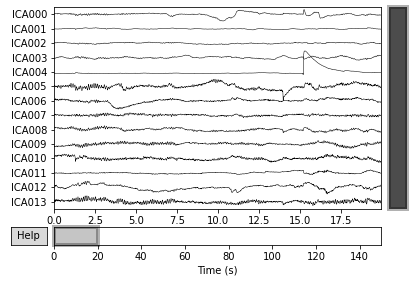

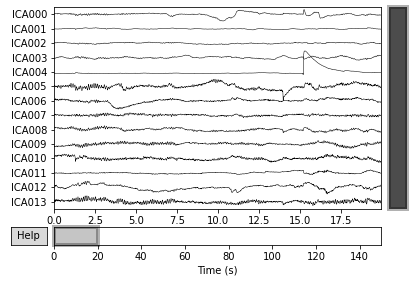

In [20]:
out_ica.plot_sources(participant_raw)

In [37]:
ica.apply(participant_raw)[0]

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


(array([[4350.26, 4349.23, 4353.85, ..., 4484.1 , 4505.64, 4524.62]]),
 array([0.00000000e+00, 7.81250000e-03, 1.56250000e-02, ...,
        1.49976562e+02, 1.49984375e+02, 1.49992188e+02]))

In [43]:
participant_raw[0]

(array([[4350.26, 4349.23, 4353.85, ..., 4484.1 , 4505.64, 4524.62]]),
 array([0.00000000e+00, 7.81250000e-03, 1.56250000e-02, ...,
        1.49976562e+02, 1.49984375e+02, 1.49992188e+02]))

In [ ]:
participant_raw.plot()

In [44]:
type(participant_raw)

mne.io.array.array.RawArray

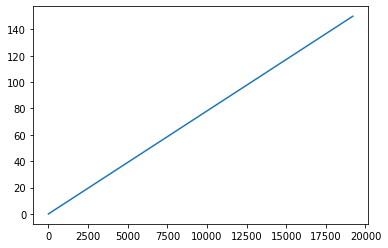

In [59]:
plt.plot(participant_raw[0][1])

In [63]:
participant_raw[0][1]

array([0.00000000e+00, 7.81250000e-03, 1.56250000e-02, ...,
       1.49976562e+02, 1.49984375e+02, 1.49992188e+02])

In [64]:
participant_raw.first_samp

0

In [66]:
participant_raw.get_data().shape

(14, 19200)

In [72]:
filtered_raw = participant_raw.filter(h_freq=1.0, l_freq=None)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 1.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Filter length: 213 samples (1.664 sec)



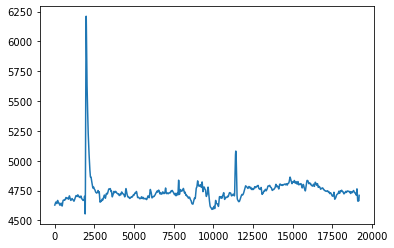

In [78]:
plt.plot(filtered_raw[1][0][0])

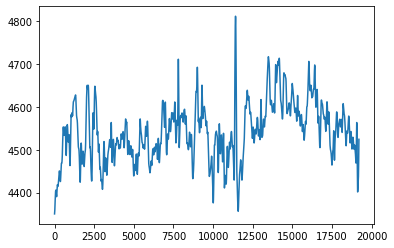

In [76]:
plt.plot(participant_raw[0][0][0])

In [79]:
filtered_data = filtered_raw.get_data()

In [81]:
ica_filtered = ica.fit(filtered_raw)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


<ipython-input-81-fcd0575a12e2>:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_filtered = ica.fit(filtered_raw)


Fitting ICA took 7.4s.


/home/srikrishna/conda/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


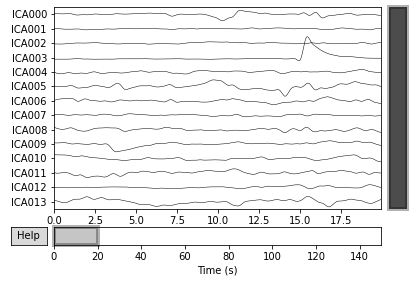

In [90]:
_ =ica_filtered.plot_sources(filtered_raw)

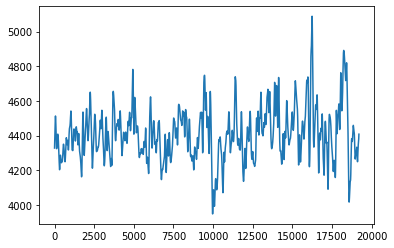

In [113]:
plt.plot(ica_out.get_data()[13, :])

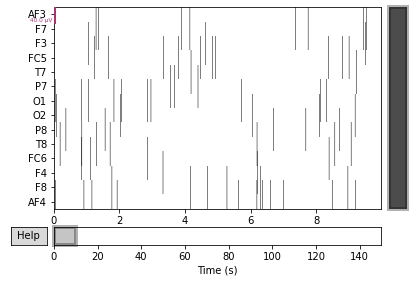

In [99]:
_ = filtered_raw.plot()

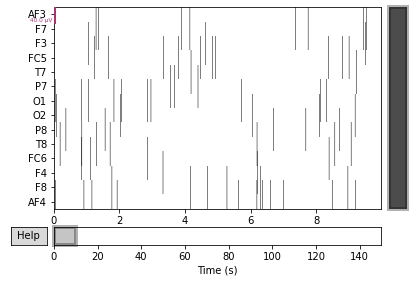

In [101]:
_ = ica_out.plot()

In [91]:
ica_out = ica_filtered.apply(filtered_raw)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


In [97]:
ica_out.get_data()[:, 0].shape

(14,)

In [114]:
ica_comps = ica_filtered.get_components()

In [ ]:
ica_filtered.

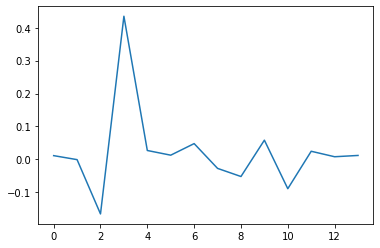

In [131]:
plt.plot(ica_comps[1, :])

##### _ = filtered_raw.plot_psd()

Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


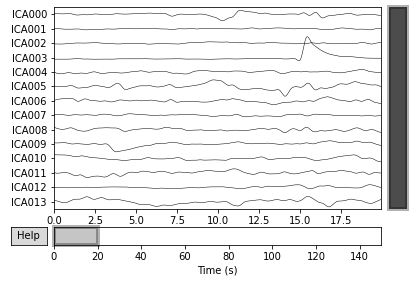

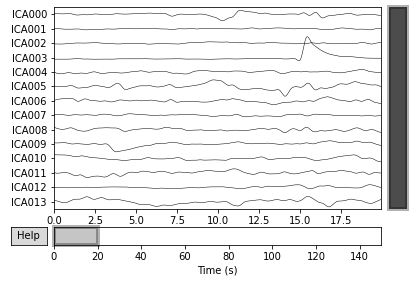

In [126]:
ica_filtered.plot_sources(filtered_raw)

Effective window size : 16.000 (s)


<ipython-input-133-1a377c3b116e>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  ica_out.plot_psd()


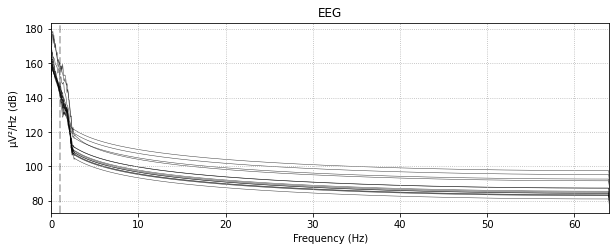

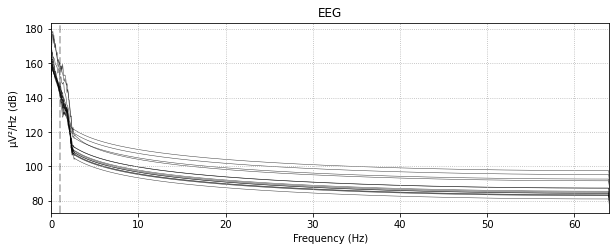

In [133]:
ica_out.plot_psd()